In [257]:
# Import necessary libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [258]:
# Load the training data
train_data = pd.read_csv('data/train_energy.csv')

# Convert DateTime column to datetime type
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])

train_data.head()

,DateTime,EnergyConsumption(kWh)
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [259]:
# Feature engineering: Add additional features
train_data['hour'] = train_data['DateTime'].dt.hour
train_data['day_of_week'] = train_data['DateTime'].dt.dayofweek
train_data['month'] = train_data['DateTime'].dt.month

# Rename columns to 'ds' for DateTime and 'y' for the target variable
train_data.rename(columns={'DateTime': 'ds', 'EnergyConsumption(kWh)': 'y'}, inplace=True)

In [260]:
# Apply log transformation to stabilize variance
train_data['y'] = np.log1p(train_data['y'])

In [261]:
# # Define the objective function for Optuna
# def objective(trial):
#     params = {
#         'changepoint_prior_scale': trial.suggest_loguniform('changepoint_prior_scale', 0.001, 0.5),
#         'seasonality_prior_scale': trial.suggest_loguniform('seasonality_prior_scale', 0.1, 20.0)
#     }
#     rmse_list = []
#     tscv = TimeSeriesSplit(n_splits=5)
#     for train_index, test_index in tscv.split(train_data):
#         train, val = train_data.iloc[train_index], train_data.iloc[test_index]
#         model = Prophet(
#             changepoint_prior_scale=params['changepoint_prior_scale'],
#             seasonality_prior_scale=params['seasonality_prior_scale'],
#         )
#         model.add_regressor('hour')
#         model.add_regressor('day_of_week')
#         model.add_regressor('month')
#         model.fit(train)
#         val_forecast = model.predict(val)
#         val['y_original'] = np.expm1(val['y'])
#         val_forecast['yhat_original'] = np.expm1(val_forecast['yhat'])
#         rmse = np.sqrt(mean_squared_error(val['y_original'], val_forecast['yhat_original']))
#         rmse_list.append(rmse)
#     return np.mean(rmse_list)

# # Create an Optuna study and optimize the objective function
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Print the best parameters and RMSE
# best_params = study.best_params
# best_rmse = study.best_value
# print(f'Best Parameters: {best_params}')
# print(f'Best Validation RMSE: {best_rmse}')

In [262]:
# Best Parameters: {'changepoint_prior_scale': 0.0010463260873719937, 'seasonality_prior_scale': 0.39508486377160346}
# Best Validation RMSE: 7.06002950400547

def create_model():
    # Create a Prophet model
    model = Prophet(
        changepoint_prior_scale=0.0010463260873719937,
        seasonality_prior_scale=0.39508486377160346,
    )

    # Add custom seasonalities and additional regressors
    # model.add_seasonality(name='hourly', period=1, fourier_order=3)
    # model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_regressor('hour')
    model.add_regressor('day_of_week')
    model.add_regressor('month')

    return model

04:16:20 - cmdstanpy - INFO - Chain [1] start processing
04:16:21 - cmdstanpy - INFO - Chain [1] done processing


Fold 1 RMSE: 8.478953844116322


/tmp/ipykernel_459769/2271067802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['y_original'] = np.expm1(val['y'])


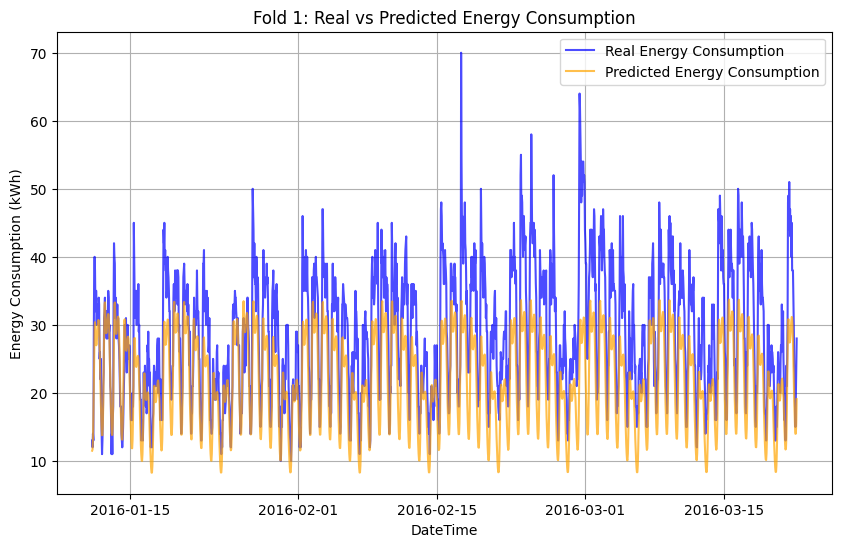

04:16:21 - cmdstanpy - INFO - Chain [1] start processing
04:16:21 - cmdstanpy - INFO - Chain [1] done processing


Fold 2 RMSE: 5.744630595042973


/tmp/ipykernel_459769/2271067802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['y_original'] = np.expm1(val['y'])


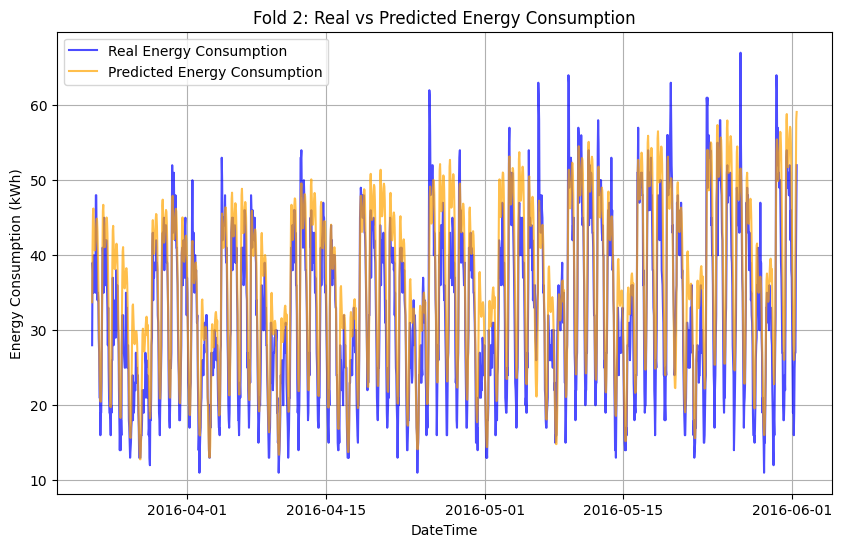

04:16:22 - cmdstanpy - INFO - Chain [1] start processing
04:16:22 - cmdstanpy - INFO - Chain [1] done processing


Fold 3 RMSE: 5.482195869853873


/tmp/ipykernel_459769/2271067802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['y_original'] = np.expm1(val['y'])


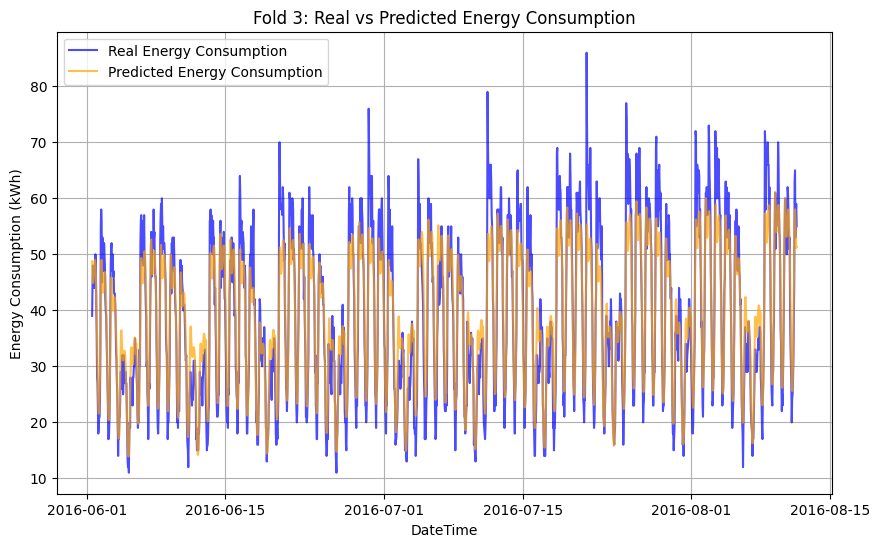

04:16:23 - cmdstanpy - INFO - Chain [1] start processing
04:16:23 - cmdstanpy - INFO - Chain [1] done processing


Fold 4 RMSE: 7.06735868204464


/tmp/ipykernel_459769/2271067802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['y_original'] = np.expm1(val['y'])


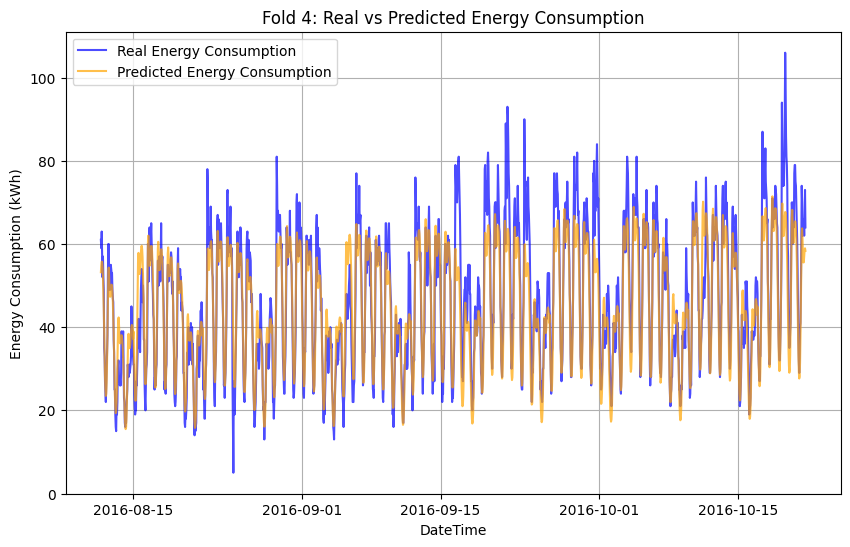

04:16:24 - cmdstanpy - INFO - Chain [1] start processing
04:16:25 - cmdstanpy - INFO - Chain [1] done processing


Fold 5 RMSE: 8.527008528969539


/tmp/ipykernel_459769/2271067802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['y_original'] = np.expm1(val['y'])


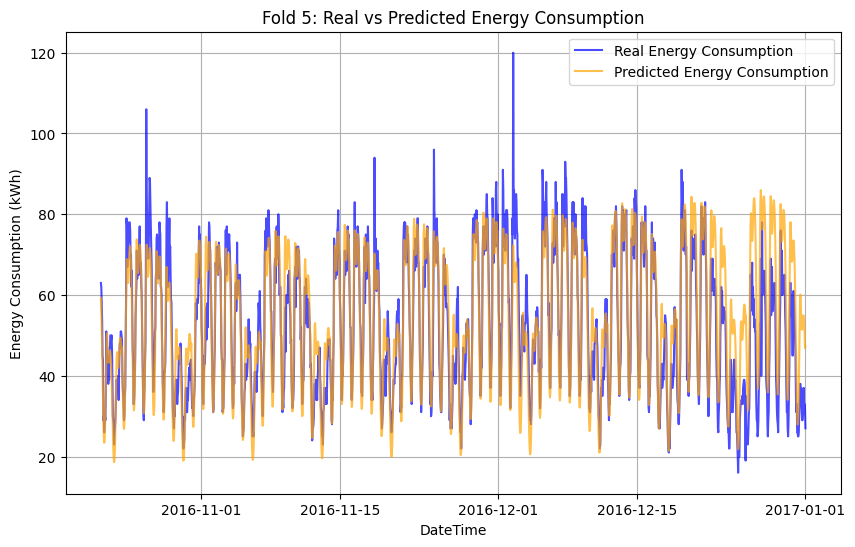

Average RMSE: 7.06002950400547


In [263]:
# Rolling window cross-validation to evaluate model robustness
tscv = TimeSeriesSplit(n_splits=5)
rmse_list = []

for i, (train_index, test_index) in enumerate(tscv.split(train_data)):
    train, val = train_data.iloc[train_index], train_data.iloc[test_index]

    # Create a new Prophet model for each fold
    model = create_model()
    
    # Fit the model on the training set
    model.fit(train)
    
    # Make predictions on the validation set
    val_forecast = model.predict(val)
    
    # Reverse log transformation for RMSE calculation and visualization
    val['y_original'] = np.expm1(val['y'])
    val_forecast['yhat_original'] = np.expm1(val_forecast['yhat'])
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(val['y_original'], val_forecast['yhat_original']))
    rmse_list.append(rmse)
    print(f'Fold {i + 1} RMSE: {rmse}')
    
    # Plot real vs. predicted values for this fold
    plt.figure(figsize=(10, 6))
    plt.plot(val['ds'], val['y_original'], label='Real Energy Consumption', color='blue', alpha=0.7)
    plt.plot(val['ds'], val_forecast['yhat_original'], label='Predicted Energy Consumption', color='orange', alpha=0.7)
    plt.title(f'Fold {i + 1}: Real vs Predicted Energy Consumption')
    plt.xlabel('DateTime')
    plt.ylabel('Energy Consumption (kWh)')
    plt.legend()
    plt.grid()
    plt.show()

print(f'Average RMSE: {np.mean(rmse_list)}')

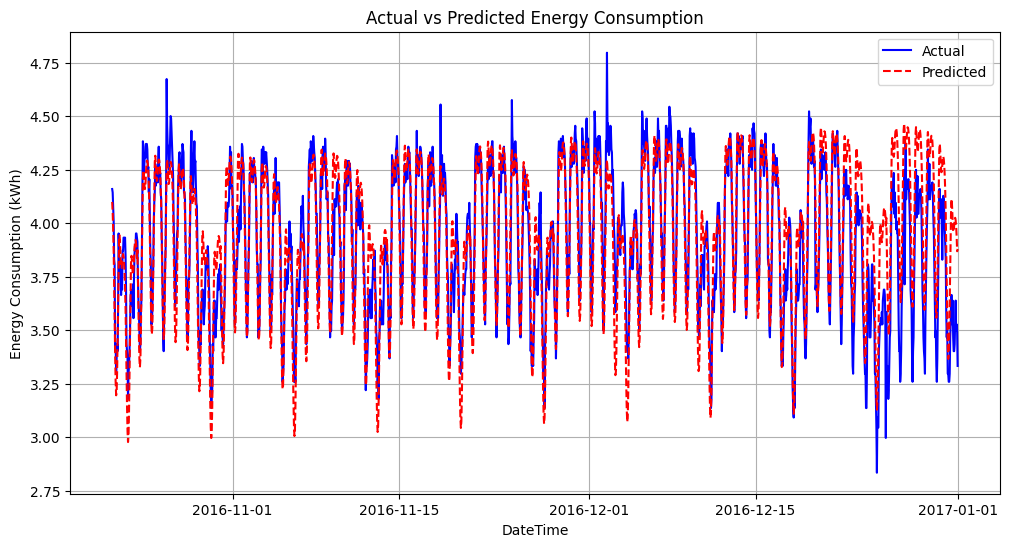

In [264]:
# 1. Actual vs Predicted Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(val['ds'], val['y'], label='Actual', color='blue')
plt.plot(val['ds'], val_forecast['yhat'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()

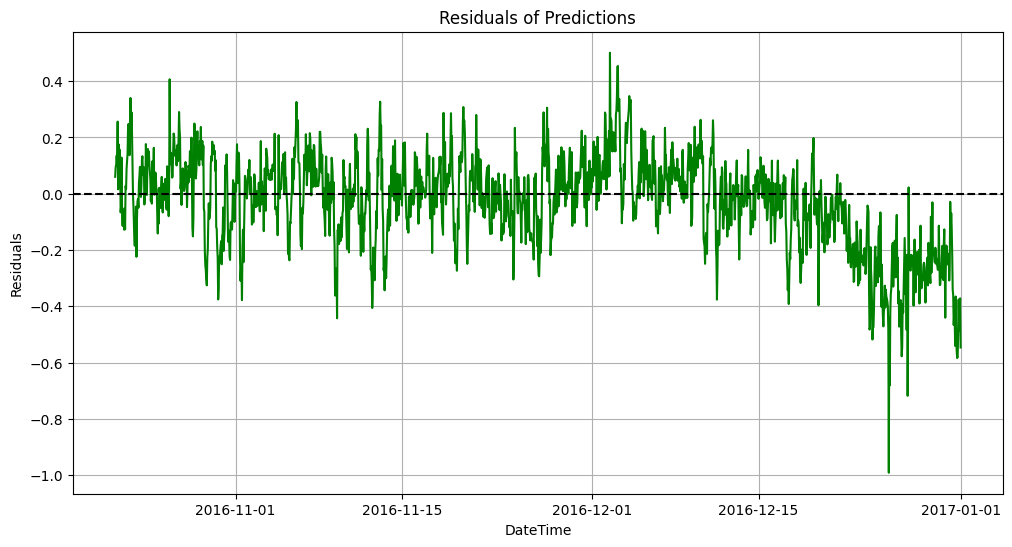

In [265]:
# Ensure that val and val_forecast have the same length
# Filter the forecast to match the validation set length
val_forecast_filtered = val_forecast[val_forecast['ds'].isin(val['ds'])]

# Compute residuals
residuals = val['y'].values - val_forecast_filtered['yhat'].values

# 2. Residuals Plot
plt.figure(figsize=(12, 6))
plt.plot(val['ds'], residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('DateTime')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

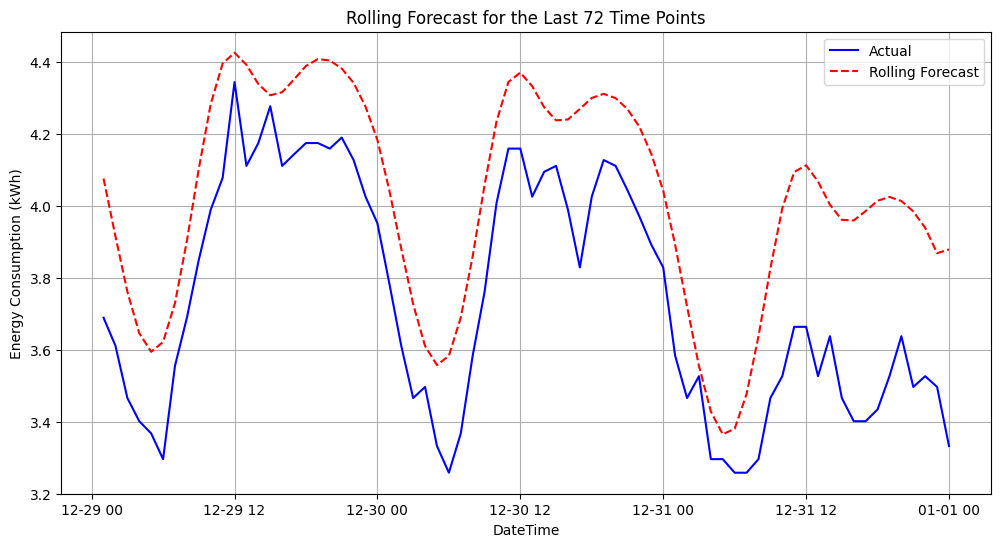

In [266]:
# 3. Rolling Forecast Plot (Use a rolling window to simulate real-time forecasting)
rolling_window = 72  # Adjust based on your time series
rolling_preds = val_forecast['yhat'][-rolling_window:]

plt.figure(figsize=(12, 6))
plt.plot(val['ds'][-rolling_window:], val['y'][-rolling_window:], label='Actual', color='blue')
plt.plot(val['ds'][-rolling_window:], rolling_preds, label='Rolling Forecast', color='red', linestyle='--')
plt.title(f'Rolling Forecast for the Last {rolling_window} Time Points')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()

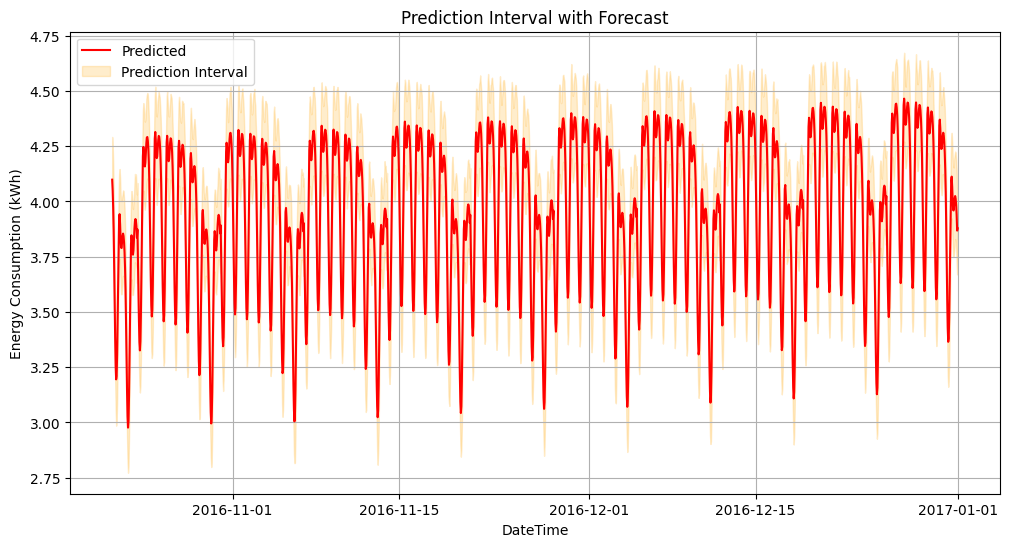

In [267]:
# 4. Prediction Intervals Plot (Prophet automatically gives 'yhat_lower' and 'yhat_upper')
plt.figure(figsize=(12, 6))
plt.plot(val['ds'], val_forecast['yhat'], label='Predicted', color='red')
plt.fill_between(val['ds'], val_forecast['yhat_lower'], val_forecast['yhat_upper'], color='orange', alpha=0.2, label='Prediction Interval')
plt.title('Prediction Interval with Forecast')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()

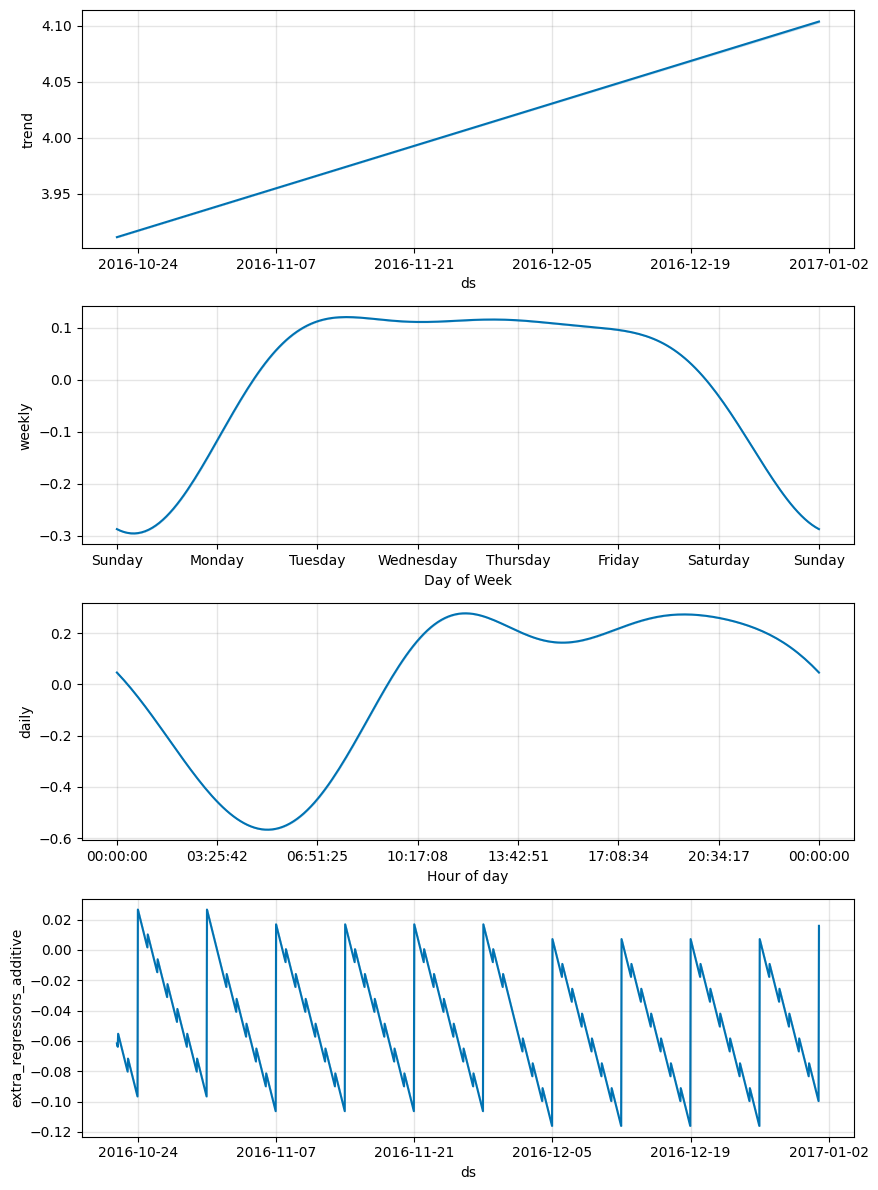

In [268]:
# 5. Seasonality Decomposition Plot
# Decompose seasonality using Prophet's built-in method
model.plot_components(val_forecast)
plt.show()

In [269]:
# Train the final model on the entire training dataset using the best hyperparameters
final_model = Prophet(
    changepoint_prior_scale=0.0010463260873719937,
    seasonality_prior_scale=0.39508486377160346,
)

# Add custom seasonalities and additional regressors
# model.add_seasonality(name='hourly', period=1, fourier_order=3)
# model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
final_model.add_regressor('hour')
final_model.add_regressor('day_of_week')
final_model.add_regressor('month')
final_model.fit(train_data)

04:16:27 - cmdstanpy - INFO - Chain [1] start processing
04:16:27 - cmdstanpy - INFO - Chain [1] done processing


In [270]:
# Load the test data
test_data = pd.read_csv('data/test_energy.csv')

# Convert DateTime column to datetime type
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])

# Feature engineering: Add additional features
test_data['hour'] = test_data['DateTime'].dt.hour
test_data['day_of_week'] = test_data['DateTime'].dt.dayofweek
test_data['month'] = test_data['DateTime'].dt.month

# Rename the 'DateTime' column to 'ds'
test_data.rename(columns={'DateTime': 'ds'}, inplace=True)

In [271]:
# Make predictions on the test data
forecast = model.predict(test_data)

# Reverse the log transformation for final predictions
test_data['EnergyConsumption(kWh)'] = np.expm1(forecast['yhat'])

In [272]:
# Save the submission file
submission = test_data[['ds', 'EnergyConsumption(kWh)']]
submission.rename(columns={'ds': 'DateTime'}, inplace=True)
submission.to_csv('prophet_submission.csv', index=False)

# Display the first few rows of the submission file
print(submission.head())

             DateTime  EnergyConsumption(kWh)
0 2017-01-01 01:00:00               40.946357
1 2017-01-01 02:00:00               34.647680
2 2017-01-01 03:00:00               29.541145
3 2017-01-01 04:00:00               26.216857
4 2017-01-01 05:00:00               24.880393


/tmp/ipykernel_459769/2221999218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={'ds': 'DateTime'}, inplace=True)


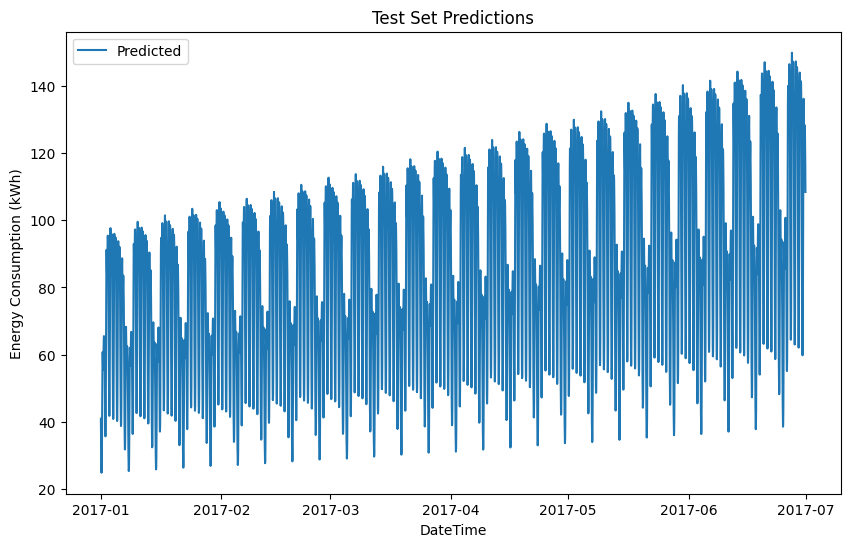

In [273]:

# Plot the final forecast
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['EnergyConsumption(kWh)'], label='Predicted')
plt.title('Test Set Predictions')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()